<img align="right" src="https://prnewswire2-a.akamaihd.net/p/1893751/sp/189375100/thumbnail/entry_id/1_p33qkid5/def_height/46/def_width/200/version/100011/type/1">

### Solution By: Vipin Choudhary
Last updated Oct 30, 2020

### Project - Concrete Strength Prediction

To predict the concrete strength using the data available in file "concrete.csv". Apply feature engineering and model tuning to obtain a score above 85%.

### Datasets Information:

<img align = "center" src="files/Data.JPG">

___

### Domain: 
***Construction***


#### GitHub Link 
`Link`

In [60]:
#Packages for data processing
import pandas as pd
import numpy as np

#Packages for Ploting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

#To warnings turn off
import warnings
warnings.filterwarnings('ignore')

#modeling package
from sklearn.model_selection import train_test_split
from scipy import stats
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_curve
from sklearn.metrics import confusion_matrix,accuracy_score, recall_score, precision_score, f1_score, classification_report


import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
import os


#########
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [61]:
df = pd.read_csv('C:/Users/choud/Downloads/UTA/Concrete_Strength_Prediction/concrete.csv')
df.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


#### Exploratory Data Analysis

In [62]:
df.shape

(1030, 9)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


##### There are no duplicates in the data

In [64]:
# Checking basic statistics like central value, std, quartiles about the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


#### The data does not contain any missing values or special symbols.

#### Skewness defination:
- skewness = 0 : normally distributed.
- skewness > 0 : more weight in the left tail of the distribution.
- skewness < 0 : more weight in the right tail of the distribution.

In [65]:
df.skew()

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

#### Features other than fineagg and coarseagg are slightly positively skewed. fineagg and coarseagg are slightly negitively skewed

In [66]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [67]:
df.isna().sum()
#### No Missing Values

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [68]:
df.nunique()
# No Unique key

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

### Univariate and Bivariate Analysis

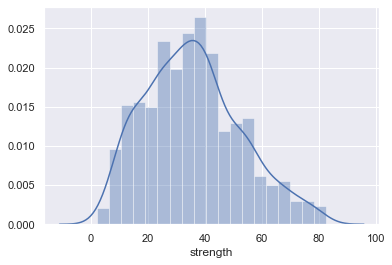

In [69]:
sns.distplot(df['strength'])
plt.show()

##### The target variable has the distribution of data to be almost normal, but with lesser values on higher range, / higher values on lesser range

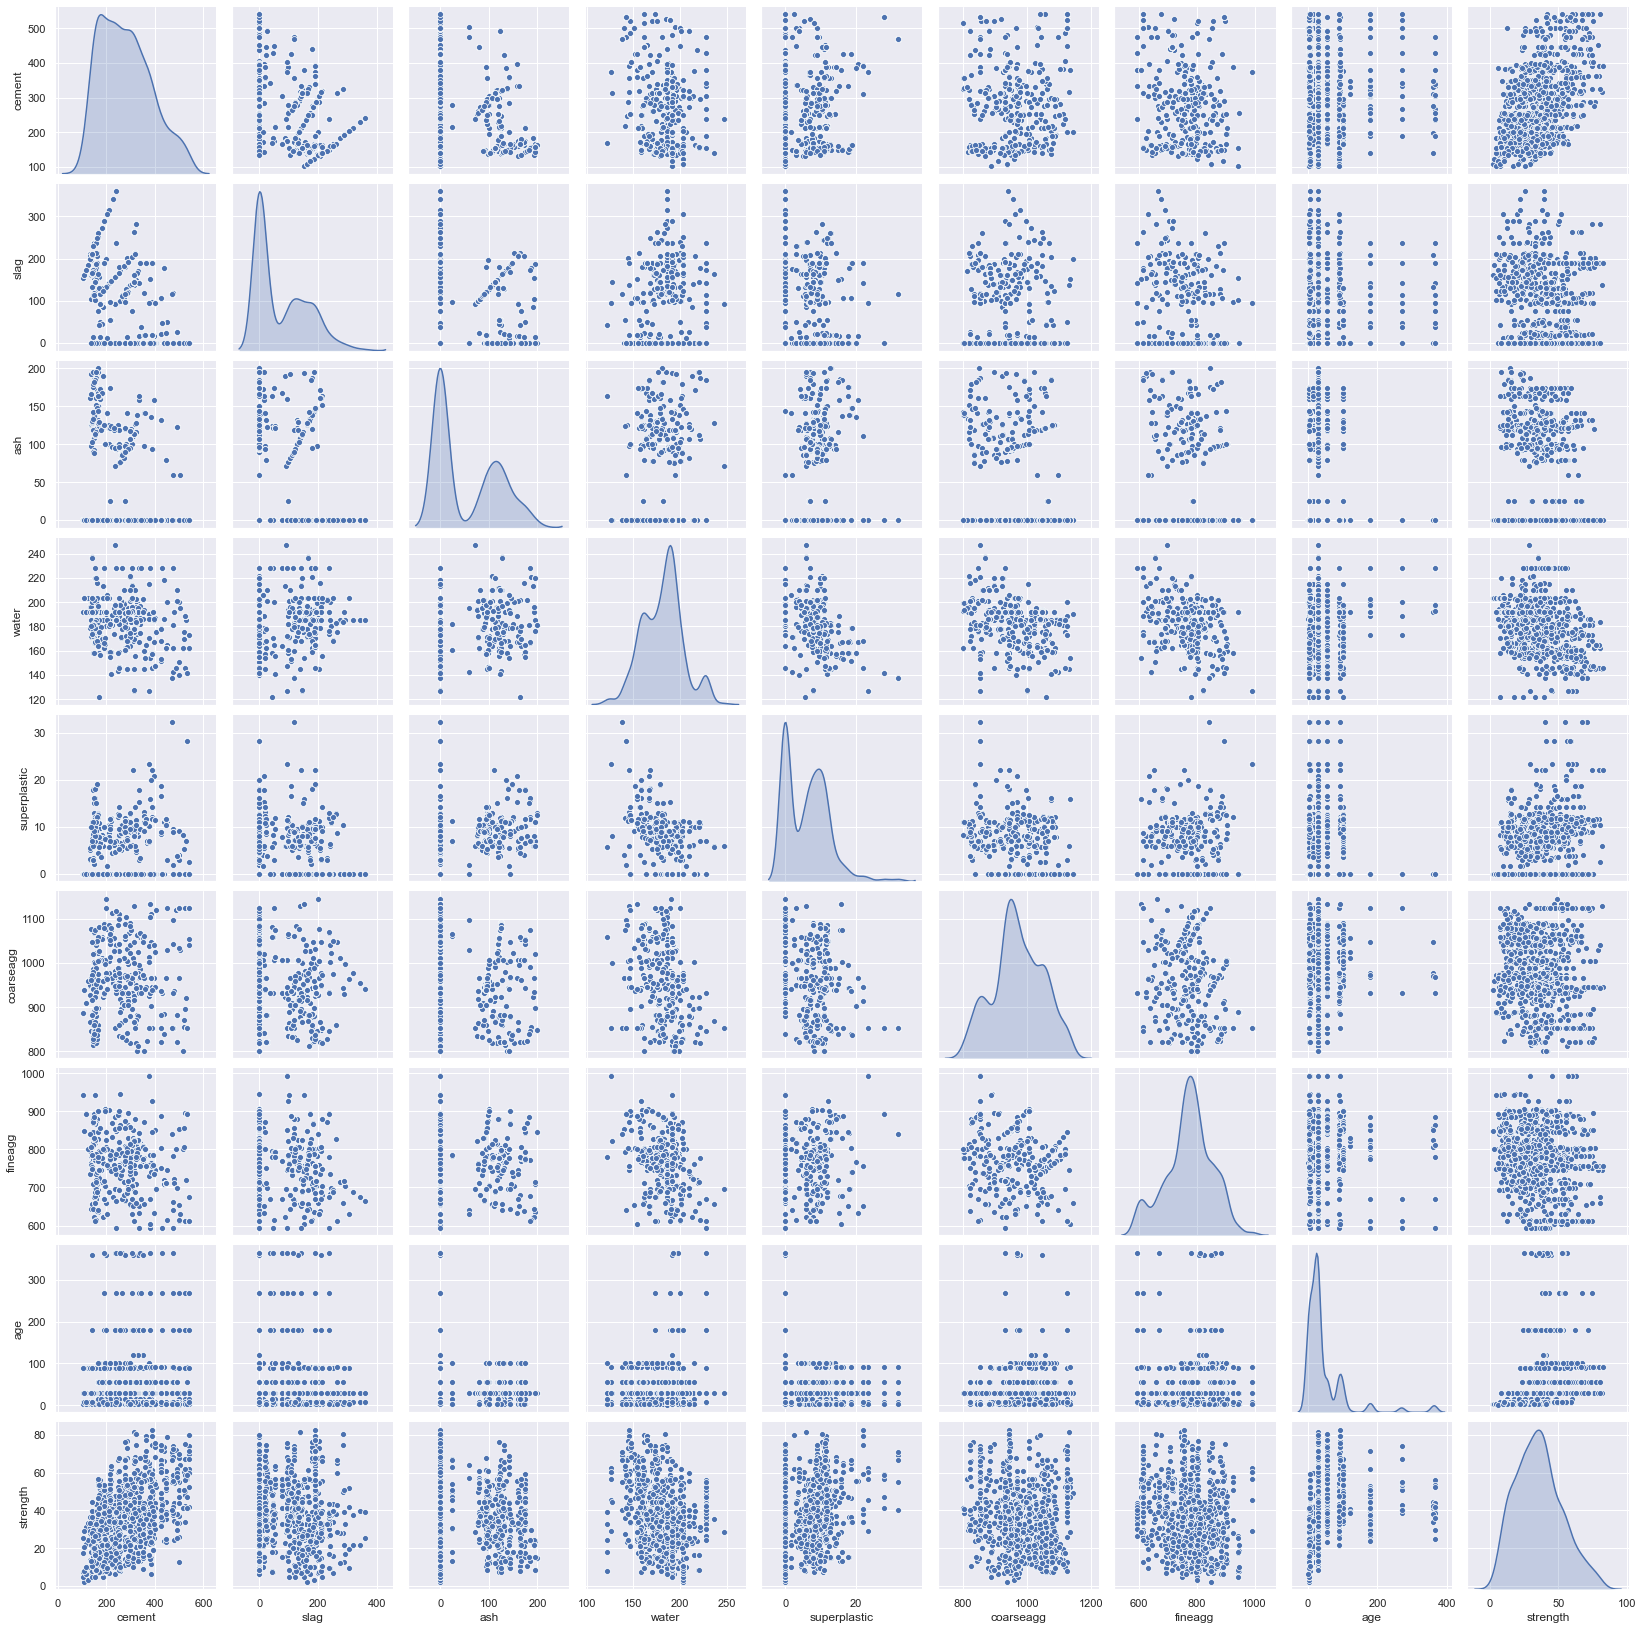

In [70]:
sns.pairplot(df, diag_kind='kde')
plt.show()

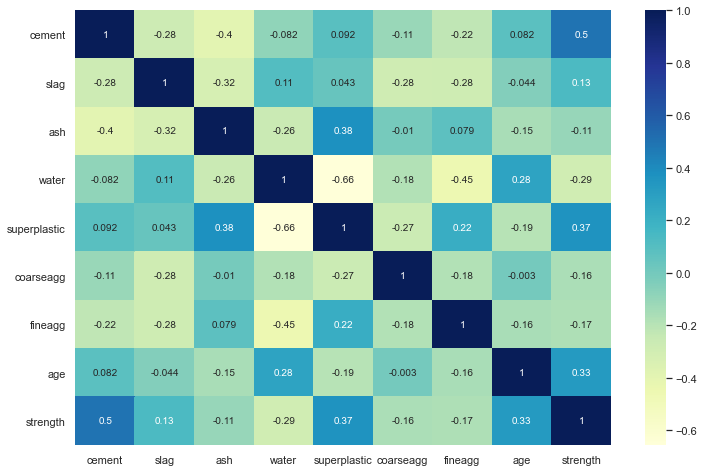

In [71]:
plt.figure(figsize=(12,8))
corr_DF = df.corr()
sns.heatmap(corr_DF, annot = True, cmap="YlGnBu")
plt.show()

#### From above, we can see:
##### There is a high coorelation between Target variable and Duration of the call.
##### There is also a high corelation between two independent variables Pdays and Previous. So we will drop one of these variables.

In [72]:
# Creating new variable Age_month from Age Feature
def label(data):
    if data["age"] <= 30:
        return "1"
    if data["age"] > 30 and data["age"] <= 60 :
        return "2"
    if data["age"] > 60 and data["age"] <= 90 :
        return "3"
    if data["age"] > 90 and data["age"] <= 120 :
        return "4"
    if data["age"] > 120 and data["age"] <= 150 :
        return "5"
    if data["age"] > 150 and data["age"] <= 180 :
        return "6"
    if data["age"] > 180 and data["age"] <= 210 :
        return "7"
    if data["age"] > 210 and data["age"] <= 240 :
        return "8"
    if data["age"] > 240 and data["age"] <= 270 :
        return "9"
    if data["age"] > 270 and data["age"] <= 300 :
        return "10"
    if data["age"] > 300 and data["age"] <= 330 :
        return "11"
    if data["age"] > 330 :
        return "12"
df["age_months"] = df.apply(lambda df:label(df) , axis=1)

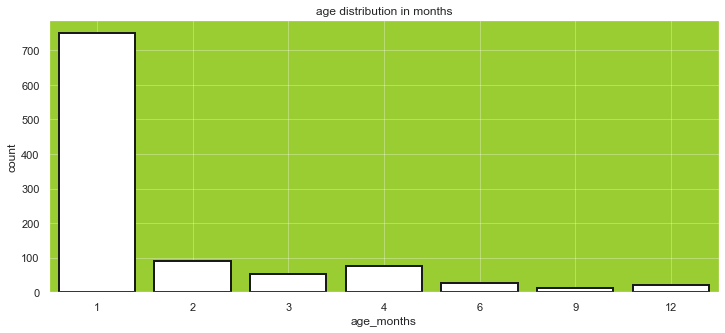

In [73]:
plt.figure(figsize=(12,5))
# order = ['1','2', '3','4','5','6','7','8','9','10','11', '12']
order = ['1','2', '3','4','6','9','12']
ax = sns.countplot(df["age_months"],
                   order=order,linewidth=2,
                   edgecolor = "k"*len(order),
                   palette=["w"])
ax.set_facecolor("yellowgreen")
plt.title("age distribution in months")
plt.grid(True,alpha=.3)
plt.show()

In [74]:
df.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,age_months
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29,1
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30,1
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,1
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06,9
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61,1


In [76]:
df['age_months'] = df['age_months'].astype('int')
# df2['strength_category'] = df2['strength_category'].astype('int')

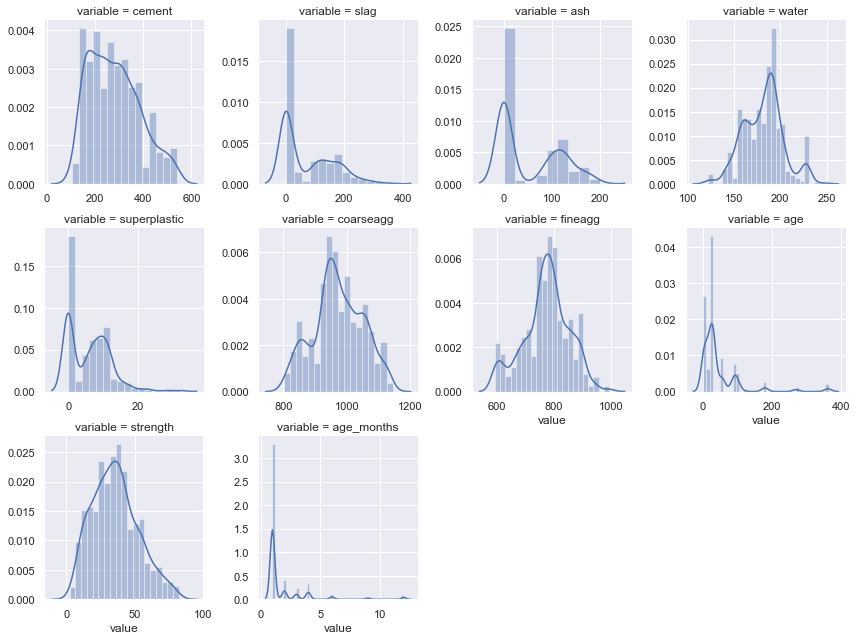

In [77]:
num = [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
plt.show()

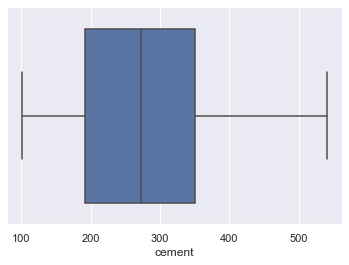

In [78]:
sns.boxplot(df['cement'])
plt.show()

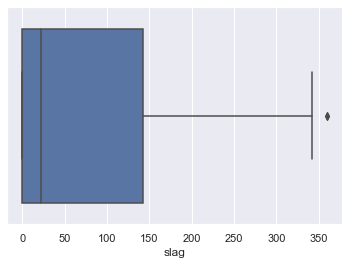

In [79]:
sns.boxplot(df['slag'])
plt.show()

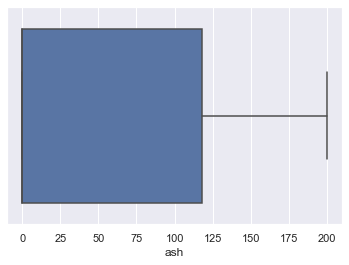

In [80]:
sns.boxplot(df['ash'])
plt.show()

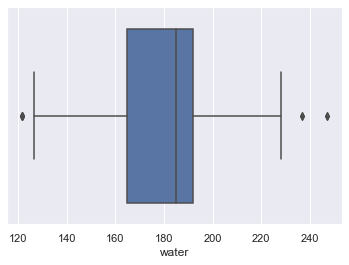

In [81]:
sns.boxplot(df['water'])
plt.show()

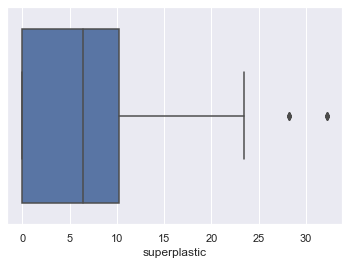

In [82]:
sns.boxplot(df['superplastic'])
plt.show()

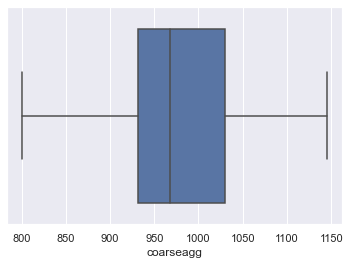

In [83]:
sns.boxplot(df['coarseagg'])
plt.show()

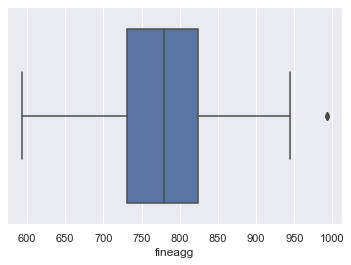

In [84]:
sns.boxplot(df['fineagg'])
plt.show()

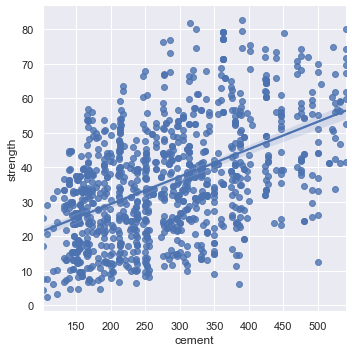

In [89]:
sns.lmplot(x='cement',y='strength',data= df)
plt.show()

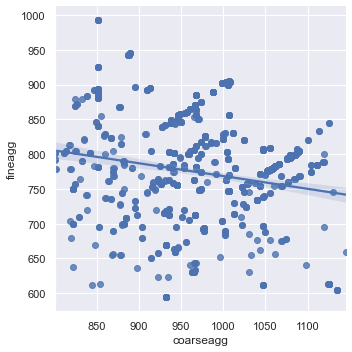

In [91]:
sns.lmplot(x='coarseagg',y='fineagg',data = df)
plt.show()

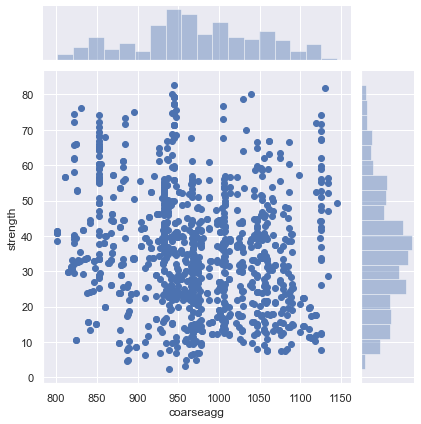

In [92]:
sns.jointplot(df['coarseagg'],df['strength'])
plt.show()

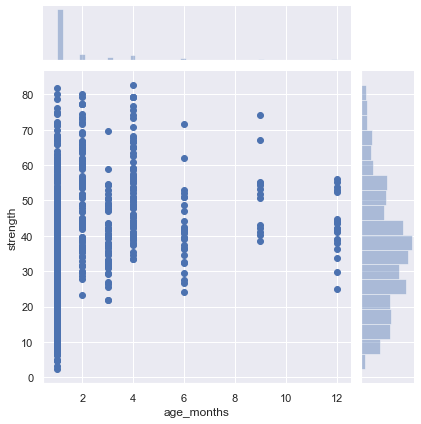

In [93]:
sns.jointplot(df['age_months'],df['strength'])
plt.show()

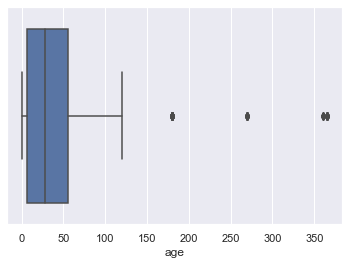

In [85]:
sns.boxplot(df['age'])
plt.show()

In [111]:
X = df.iloc[:,df.columns !='strength']
y = np.array(df['strength'])
Low_Quantile = X.quantile(0.05)
High_Quantile = X.quantile(0.95)

In [112]:
X.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age_months
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,1
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,1
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,1
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,1
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,1


In [113]:
X = pd.get_dummies(X,columns = ['age_months'],drop_first = True)
X.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age_months_2,age_months_3,age_months_4,age_months_6,age_months_9,age_months_12
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,0,0,0,0,0,0
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,0,0,0,0,0,0
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,0,0,0,0,0,0
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,0,0,0,0,0,0
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,0,0,0,0,0,0


In [88]:
LowOutliers_data = (X< Low_Quantile)
HighOutliers_data = (X > High_Quantile)
X.mask(LowOutliers_data, Low_Quantile, axis=1, inplace = True)  
X.mask(HighOutliers_data,High_Quantile,axis =1, inplace = True)

#### Model 1 - Linear Regression

In [95]:
df.drop(['age'],axis=1,inplace = True)
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(X)
df_normalized = pd.DataFrame(df_normalized,columns = X.columns)

KeyError: "['age'] not found in axis"

In [96]:
xtrain,xtest,ytrain,ytest = train_test_split(df_normalized,y,test_size = 0.3 , random_state=5)

In [97]:
lm = LinearRegression()
lm.fit(xtrain,ytrain)
y_predict_lm = lm.predict(xtest)

In [98]:
print(lm.score(xtrain,ytrain))
print(lm.score(xtest,ytest))

0.8302148338436011
0.8106574093376476


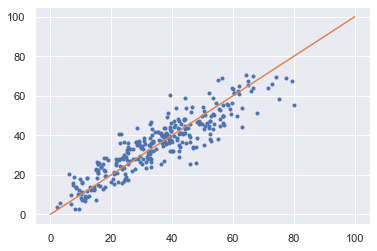

In [99]:
plt.plot(ytest, y_predict_lm, '.')
x = np.linspace(0, 100, 100)
y = x
plt.plot(x, y)
plt.show()

In [154]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t Accuracy")
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(ytest, y_predict_lm)),mean_squared_error(ytest, y_predict_lm),
            mean_absolute_error(ytest, y_predict_lm), lm.score(xtest,ytest)))


Model			 RMSE 		 MSE 		 MAE 		 Accuracy
LinearRegression 	 7.11 		 50.51 		5.59 		0.81


In [157]:
resultsDf = pd.DataFrame({'Method':['Linear Regression'], 'Accuracy': lm.score(xtest,ytest),'RMSE': np.sqrt(mean_squared_error(ytest, y_predict_lm)),'MSE':mean_squared_error(ytest, y_predict_lm),'MAE':mean_absolute_error(ytest, y_predict_lm)})
resultsDf = resultsDf[['Method', 'Accuracy','RMSE','MSE','MAE']]
resultsDf

,Method,Accuracy,RMSE,MSE,MAE
0,Linear Regression,0.810657,7.107195,50.512218,5.594757


#### Model 2-Adabooster

In [100]:
# from sklearn.ensemble import AdaBoostRegressor
abrg = AdaBoostRegressor( n_estimators= 20)
abrg= abrg.fit(xtrain,ytrain)

test_pred = abrg.predict(xtest)
abrg.score(xtest,ytest)

0.7168659338614292

In [153]:
print("Model\t\t RMSE \t\t\t MSE \t\t\t MAE \t\t Accuracy")
print("""Adabooster \t {:.2f} \t\t\t {:.2f} \t\t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(ytest, test_pred)),mean_squared_error(ytest, test_pred),
            mean_absolute_error(ytest, test_pred),abrg.score(xtest,ytest)))

Model		 RMSE 			 MSE 			 MAE 		 Accuracy
Adabooster 	 8.69 			 75.53 			7.37 		0.72


In [158]:
tempResultsAB = pd.DataFrame({'Method':['AdaBooster'], 'Accuracy': abrg.score(xtest,ytest),'RMSE': np.sqrt(mean_squared_error(ytest, test_pred)),'MSE':mean_squared_error(ytest, test_pred),'MAE':mean_absolute_error(ytest, test_pred)})
resultsDf = pd.concat([resultsDf, tempResultsAB])
resultsDf = resultsDf[['Method','Accuracy','RMSE','MSE','MAE']]
resultsDf

,Method,Accuracy,RMSE,MSE,MAE
0,Linear Regression,0.810657,7.107195,50.512218,5.594757
0,AdaBooster,0.716866,8.691008,75.533612,7.368061


#### Model 3 - Random FOrest Regressor with Grid Search using K-fold

In [101]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
# Perform Grid-Search
gsc = GridSearchCV(
        estimator=RandomForestRegressor(random_state=7),
        param_grid={
            'max_depth': [4,5,3],
            'max_features': ['sqrt','log2',0.5],
            'min_samples_leaf': [1,3],
            'min_samples_split': [2,3],
            'n_estimators': [25,50,100]
        },
        cv=5)
    
grid_result = gsc.fit(xtrain,ytrain)
best_params = grid_result.best_params_
    
rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=False,
                            verbose=False)
# Perform K-Fold CV
scores = cross_val_score(rfr, xtrain,ytrain, cv=10, scoring='neg_mean_absolute_error')
print(scores)

[-4.61199548 -5.06239943 -5.11130812 -5.28554501 -4.61451869 -5.19962881
 -5.77530865 -5.77291472 -5.83989689 -5.91123249]


In [106]:
print(grid_result,best_params)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=7,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [103]:
rfmodel = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=False,
                            verbose=False)
rfmodel.fit(xtrain,ytrain)
rf_y_pred = rfmodel.predict(xtest)

In [104]:
rfmodel.score(xtrain,ytrain)
rfmodel.score(xtest,ytest)

0.8255423312748635

In [105]:
print("Training Score",rfmodel.score(xtrain,ytrain))
print("Testing Score",rfmodel.score(xtest,ytest))

Training Score 0.8854338051978626
Testing Score 0.8255423312748635


In [147]:
print("Model\t\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t Accuracy")
print("""RandomForestRegressor with Grid Search \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(ytest, rf_y_pred)),mean_squared_error(ytest, rf_y_pred),
            mean_absolute_error(ytest, rf_y_pred),rfmodel.score(xtest,ytest)))

Model					 RMSE 		 MSE 		 MAE 		 Accuracy
RandomForestRegressor with Grid Search 	 5.73 		 32.83 		4.34 		0.83


In [159]:
tempResultsGS = pd.DataFrame({'Method':['Random Forest Grid Search'], 'Accuracy': rfmodel.score(xtest,ytest),'RMSE': np.sqrt(mean_squared_error(ytest, rf_y_pred)),'MSE':mean_squared_error(ytest, rf_y_pred),'MAE':mean_absolute_error(ytest, rf_y_pred)})
resultsDf = pd.concat([resultsDf, tempResultsGS])
resultsDf = resultsDf[['Method','Accuracy','RMSE','MSE','MAE']]
resultsDf

,Method,Accuracy,RMSE,MSE,MAE
0,Linear Regression,0.810657,7.107195,50.512218,5.594757
0,AdaBooster,0.716866,8.691008,75.533612,7.368061
0,Random Forest Grid Search,0.825542,5.729525,32.827455,4.340666


#### Model 4 - Random Forest Regressor with random Search using K-fold

In [107]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
clf = RandomForestRegressor()


rsv =   RandomizedSearchCV(
        estimator=RandomForestRegressor(random_state=7),
        param_distributions={"max_depth": [4, None],
              "max_features": randint(1, 9),
              "min_samples_split": randint(2, 20),
              "min_samples_leaf": randint(1, 20)
              }
        )
    
rsv_result = rsv.fit(xtrain,ytrain)
best_params = rsv_result.best_params_
    
rfm = RandomForestRegressor(max_depth=best_params["max_depth"],min_samples_leaf=best_params["min_samples_leaf"],min_samples_split=best_params["min_samples_split"],random_state=True,
                            verbose=False)
# Perform K-Fold CV
scores = cross_val_score(rfm, xtrain,ytrain, cv=10)
print(scores)

[0.90936541 0.81914215 0.88085101 0.85859556 0.8774868  0.89410841
 0.83426773 0.84705937 0.85048447 0.85237361]


In [108]:
print(rsv_result,best_params)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                           

In [131]:
rfmmodel = RandomForestRegressor(max_depth=best_params["max_depth"],min_samples_leaf=best_params["min_samples_leaf"], min_samples_split=best_params["min_samples_split"],random_state=False,
                            verbose=False)
rfmmodel.fit(xtrain,ytrain)
rs_y_pred = rfmmodel.predict(xtest)

In [132]:
print("Training Score",rfmmodel.score(xtrain,ytrain))
print("Testing Score",rfmmodel.score(xtest,ytest))

Training Score 0.9334039660510667
Testing Score 0.8769478838705589


In [135]:
print("Model\t\t\t\t\t RMSE \t\t MSE \t MAE \t\t R2 \t\t Accuracy")
print("""RandomForestRegressor with random Search \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(ytest, rs_y_pred)),mean_squared_error(ytest, rs_y_pred),
            mean_absolute_error(ytest, rs_y_pred), r2_score(ytest, rs_y_pred),rfmmodel.score(xtest,ytest)))

Model					 RMSE 		 MSE 	 MAE 		 R2 		 Accuracy
RandomForestRegressor with random Search 	 5.73 		 32.83 	4.34 		0.88 		0.88


In [160]:
tempResultsRS = pd.DataFrame({'Method':['Random Forest Random Search'], 'Accuracy': rfmmodel.score(xtest,ytest),'RMSE': np.sqrt(mean_squared_error(ytest, rs_y_pred)),'MSE':mean_squared_error(ytest, rs_y_pred),'MAE':mean_absolute_error(ytest, rs_y_pred)})
resultsDf = pd.concat([resultsDf, tempResultsRS])
resultsDf = resultsDf[['Method','Accuracy','RMSE','MSE','MAE']]
resultsDf

,Method,Accuracy,RMSE,MSE,MAE
0,Linear Regression,0.810657,7.107195,50.512218,5.594757
0,AdaBooster,0.716866,8.691008,75.533612,7.368061
0,Random Forest Grid Search,0.825542,5.729525,32.827455,4.340666
0,Random Forest Random Search,0.876948,5.729525,32.827455,4.340666
